<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Stats - Mini Project  <br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

## Fifa dataset

In [2]:
df = pd.read_csv('fifa_stats.csv')
df.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [3]:
df.info()
# information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      2000 non-null   object 
 1   Age                       2000 non-null   int64  
 2   Nationality               2000 non-null   object 
 3   Overall_rating            2000 non-null   int64  
 4   Potential                 2000 non-null   int64  
 5   Club                      1981 non-null   object 
 6   Preferred Foot            2000 non-null   object 
 7   International Reputation  2000 non-null   int64  
 8   Weak Foot                 2000 non-null   int64  
 9   Skill Moves               2000 non-null   int64  
 10  Work Rate                 2000 non-null   object 
 11  Position                  2000 non-null   object 
 12  Jersey Number             2000 non-null   int64  
 13  Height                    2000 non-null   float64
 14  Weight  

In [4]:
df.describe(include = 'all')
# statistical information about dataset

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
count,2000,2000.000000,2000,2000.000000,2000.000000,1981,2000,2000.000000,2000.000000,2000.000000,2000,2000,2000.000000,2000.000000,2000.000000
unique,1970,NaN,95,NaN,NaN,285,2,NaN,NaN,NaN,8,27,NaN,NaN,NaN
top,Danilo,NaN,Spain,NaN,NaN,Chelsea,Right,NaN,NaN,NaN,Medium/ Medium,GK,NaN,NaN,NaN
freq,3,NaN,251,NaN,NaN,24,1534,NaN,NaN,NaN,733,194,NaN,NaN,NaN
mean,NaN,27.231500,NaN,78.197000,80.303500,NaN,NaN,1.774500,3.204000,2.919500,NaN,NaN,15.205500,5.781042,169.478000
std,NaN,3.859061,NaN,3.285969,4.114104,NaN,NaN,0.811775,0.728457,0.964098,NaN,NaN,13.210508,0.443337,16.050306
min,NaN,17.000000,NaN,75.000000,75.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,1.000000,5.083333,123.000000
25%,NaN,24.000000,NaN,76.000000,77.000000,NaN,NaN,1.000000,3.000000,2.000000,NaN,NaN,7.000000,5.500000,159.000000
50%,NaN,27.000000,NaN,77.000000,80.000000,NaN,NaN,2.000000,3.000000,3.000000,NaN,NaN,12.000000,6.000000,170.000000
75%,NaN,30.000000,NaN,80.000000,83.000000,NaN,NaN,2.000000,4.000000,4.000000,NaN,NaN,20.000000,6.166667,181.000000


In [5]:
for i in df.columns:
    print(i, df[i].nunique())
    
# columns and their unique value counts

Name 1970
Age 24
Nationality 95
Overall_rating 19
Potential 21
Club 285
Preferred Foot 2
International Reputation 5
Weak Foot 5
Skill Moves 5
Work Rate 8
Position 27
Jersey Number 67
Height 17
Weight 47


In [6]:
num_data = df.select_dtypes(include = np.number)
num_data.head()

# numerical data from dataset

,Age,Overall_rating,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight
0,31,94,94,5,4,4,10,5.583333,159
1,33,94,94,5,4,5,7,6.166667,183
2,26,92,93,5,5,5,10,5.750000,150
3,27,91,93,4,3,1,1,6.333333,168
4,27,91,92,4,5,4,7,5.083333,154


In [7]:
cat_data = df.select_dtypes(exclude = np.number)
cat_data.head()

# categorical data from dataset

,Name,Nationality,Club,Preferred Foot,Work Rate,Position
0,L. Messi,Argentina,FC Barcelona,Left,Medium/ Medium,RF
1,Cristiano Ronaldo,Portugal,Juventus,Right,High/ Low,ST
2,Neymar Jr,Brazil,Paris Saint-Germain,Right,High/ Medium,LW
3,De Gea,Spain,Manchester United,Right,Medium/ Medium,GK
4,K. De Bruyne,Belgium,Manchester City,Right,High/ High,RCM


### Missing value treatment

In [8]:
df.isnull().sum() / len(df) * 100
# Club has 0.95% null values
# no column has more than 40% null values 

Name                        0.00
Age                         0.00
Nationality                 0.00
Overall_rating              0.00
Potential                   0.00
Club                        0.95
Preferred Foot              0.00
International Reputation    0.00
Weak Foot                   0.00
Skill Moves                 0.00
Work Rate                   0.00
Position                    0.00
Jersey Number               0.00
Height                      0.00
Weight                      0.00
dtype: float64

In [9]:
df['Club'].mode()
# mode value of CLub is Chelsea 

0    Chelsea
dtype: object

In [10]:
df['Club'].value_counts()
# chelsea club has got 24 counts

Chelsea                  24
Manchester United        23
Napoli                   23
Borussia Dortmund        23
Liverpool                23
                         ..
Sport Club do Recife      1
ADO Den Haag              1
Club AtlÃ©tico LanÃºs     1
Kashima Antlers           1
Universidad CatÃ³lica     1
Name: Club, Length: 285, dtype: int64

In [11]:
df['Club'].isnull().sum()
# 19 null values in Club

19

In [12]:
# mode imputation
df['Club'] = df['Club'].fillna(df['Club'].mode()[0])

In [13]:
df['Club'].value_counts()
# after mode imputation, Chelsea counts increased to 43 from 24

Chelsea                  43
Manchester United        23
Napoli                   23
Borussia Dortmund        23
Liverpool                23
                         ..
Sport Club do Recife      1
ADO Den Haag              1
Club AtlÃ©tico LanÃºs     1
Kashima Antlers           1
Universidad CatÃ³lica     1
Name: Club, Length: 285, dtype: int64

In [14]:
df['Club'].isnull().sum()
# null values replaced using mode imputation

0

### Outlier treatment

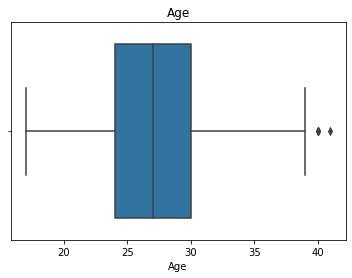

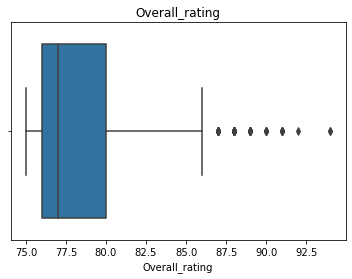

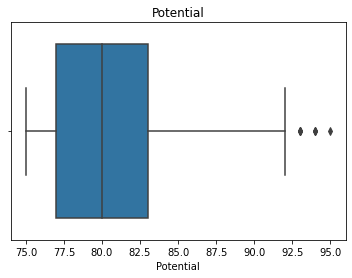

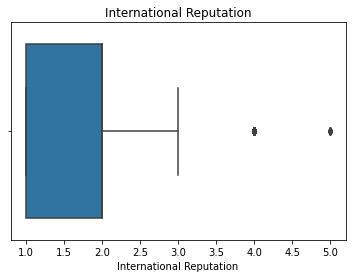

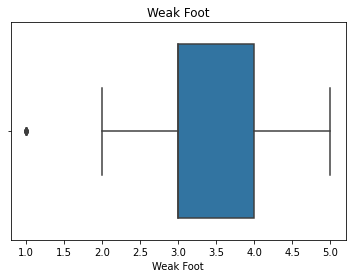

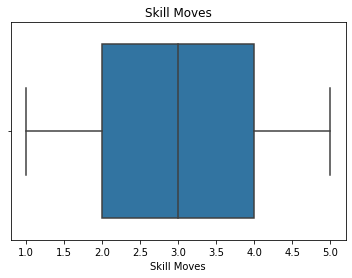

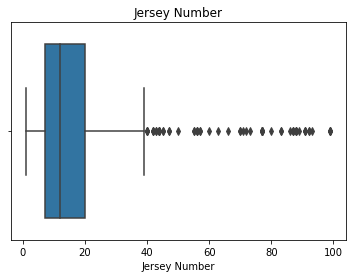

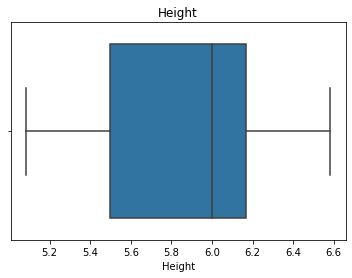

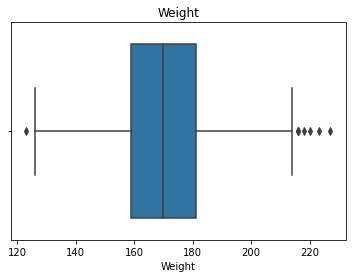

In [15]:
for i in num_data.columns:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()
    
# skill_moves and  height columns have no outliers
# Overall_rating, Jersey_number has more outliers in upper bound

Age


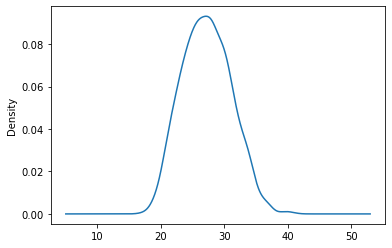

Overall_rating


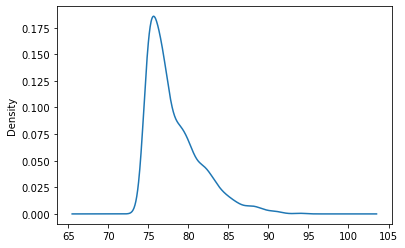

Potential


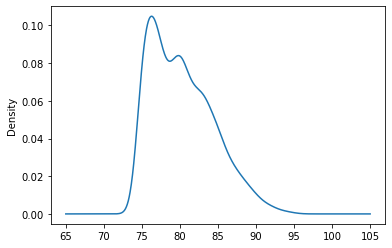

International Reputation


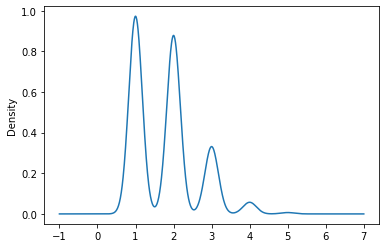

Weak Foot


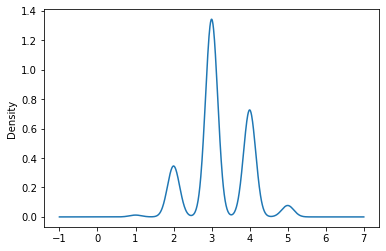

Skill Moves


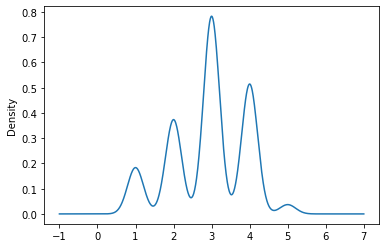

Jersey Number


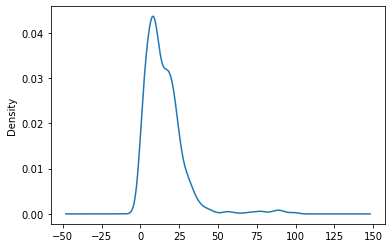

Height


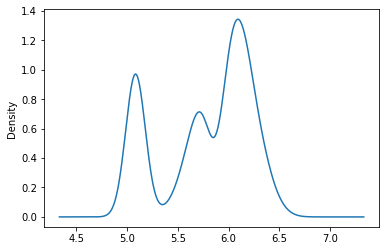

Weight


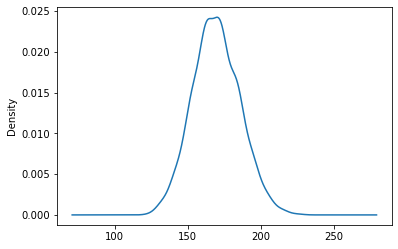

In [16]:
# distributions of features

for i in num_data.columns:
    print(i)
    df[i].plot(kind = 'kde')
    plt.show()

In [17]:
# transformation

for i in num_data.columns:
    print(i, df[i].skew().round(2))

# skewness of numerical features

Age 0.2
Overall_rating 1.37
Potential 0.67
International Reputation 0.85
Weak Foot 0.07
Skill Moves -0.36
Jersey Number 2.84
Height -0.54
Weight 0.16


#### a)	Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

#### b)	Is there any evidence that the players overall rating is greater than 80?

#### c)	Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

#### d)	Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

#### e)	Does skill move have any effect in overall rating. Perform the graphical analysis and the statistical analysis.


<AxesSubplot:xlabel='Age', ylabel='Density'>

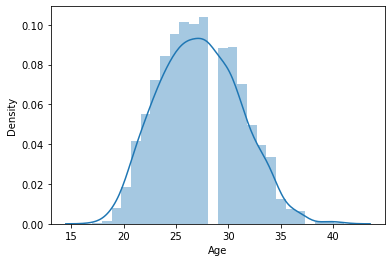

In [20]:
age = df['Age']
sns.distplot(df['Age'])
# population distplot

<AxesSubplot:ylabel='Density'>

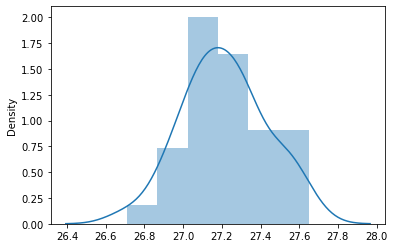

In [21]:
sample_size = 200
no_of_samples = 35
sample_mean_list = []

for i in range(no_of_samples):
    sample = np.random.choice(age, size = sample_size, replace = False)
    sample_mean_list.append(sample.mean())

sns.distplot(sample_mean_list)

In [22]:
pd.Series(sample_mean_list).skew().round(2)
# skewness is approx. 0

0.04

In [23]:
sigma = age.std()
n = len(sample)
std_err = (sigma / np.sqrt(n)).round(2)
print('standard error of sampling distribution : ', std_err)

smean = np.mean(sample_mean_list).round(2)
print('mean of sampling distribution : ', smean)

standard error of sampling distribution :  0.27
mean of sampling distribution :  27.21


In [24]:
mu = np.mean(age)
print('population mean : ', mu)

print('population std dev : ', sigma)

population mean :  27.2315
population std dev :  3.8590612753574423


In [25]:
# CLT : Irrespective of population distribution, sampling distribution is always normally distributed
# skewness of sampling means is approx 0
# mean of population and sampling mean is approx. same

In [26]:
# why the estimated standard error of a sample mean tends to decrease with an increase in sample size

# std_err = (sigma / np.sqrt(n))

# Standard error decreases when sample size increases as the sample size gets closer to the true size of the population,
# the sample means cluster more and more around the true population mean

In [27]:
# b)	Is there any evidence that the players overall rating is greater than 80?
rating = df['Overall_rating']

# Ho : skew = 0 (data is normal)
# Ha : skew != 0 (data is not normal)

print(stats.shapiro(rating))

# p_val = 0.00
# sig.lvl = 0.05
# p_val < sig.lvl
# alternate hypothesis accepted
# data is not normal

ShapiroResult(statistic=0.8525537848472595, pvalue=1.0221183102662362e-39)


In [28]:
# Ho : players overall rating is greater than 80
# Ha : players overall rating is less than 80

# data is not normal
# pop std is not known
# one sample non-parametric wilcoxon test - left tailed

m0 = 80
diff = np.array(rating) - m0

t_test, p_val = stats.wilcoxon(diff)
print('t_test : ', t_test)
print('p_val : ', p_val/2)

# p_val = 0.00
# sig.lvl = 0.05
# p_val < sig.lvl
# alternate hypothesis accepted

# players overall rating is less than 80

t_test :  340568.5
p_val :  2.0724784072395205e-114


In [29]:
# c)	Perform the statistical test to identify whether preferred foot has any impact on potential. 
# Also, perform the graphical analysis.

left_pot = df[df['Preferred Foot'] == 'Left']['Potential']
right_pot = df[df['Preferred Foot'] == 'Right']['Potential']

# Ho : skew = 0 (data is normal)
# Ha : skew != 0 (data is not normal)

print(stats.shapiro(left_pot))
print(stats.shapiro(right_pot))

# p_val = 0.00
# sig.lvl = 0.05
# p_val < sig.lvl
# alternate hypothesis accepted
# data is not normal

ShapiroResult(statistic=0.9422042369842529, pvalue=1.7173475098594682e-12)
ShapiroResult(statistic=0.9369121193885803, pvalue=5.342442151473519e-25)


In [30]:
# Ho : mu1 = mu2 (independant)
# Ha : mu1 != mu2 (dependant)

# data is not normal
# pop std is not known
# non parametric - 2 sample unpaired mannwhitneyu test - 2 tailed

t_stat, p_val = stats.mannwhitneyu(left_pot, right_pot)
print('t_stat : ', t_stat)
print('p_val : ', p_val)

# p_val = 0.11
# sig.lvl = 0.05
# p_val > sig.lvl
# null hypothesis accepted

# preferred foot has no impact on potential

t_stat :  344181.0
p_val :  0.111812406208667


<AxesSubplot:xlabel='Preferred Foot', ylabel='Potential'>

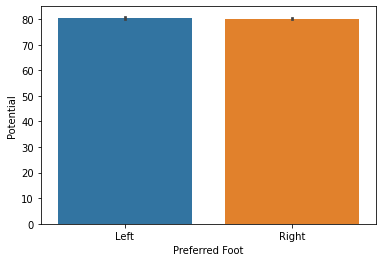

In [31]:
sns.barplot(x = 'Preferred Foot', y = 'Potential', data= df)
# both left and right has same level of potential

<AxesSubplot:xlabel='Preferred Foot', ylabel='Potential'>

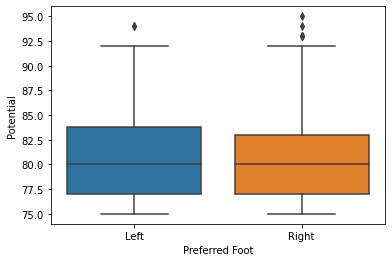

In [32]:
sns.boxplot(x = 'Preferred Foot', y = 'Potential', data= df)
# preferred foot has no relation with potential

In [33]:
# d)	Perform the statistical test to identify the relation between the overall rating and potential. 
# [Assume both are continuous data points].

rating = df['Overall_rating']
ptl = df['Potential']

# Ho : skew = 0 (data is normal)
# Ha : skew != 0 (data is not normal)

print(stats.shapiro(rating))
print(stats.shapiro(ptl))

# p_val = 0.00
# sig.lvl = 0.05
# p_val < sig.lvl
# alternate hypothesis accepted
# data is not normal

ShapiroResult(statistic=0.8525537848472595, pvalue=1.0221183102662362e-39)
ShapiroResult(statistic=0.9384800791740417, pvalue=5.016414837142018e-28)


In [34]:
# Ho : mu1 = mu2 (no relation)
# Ha : mu1 != mu2 (relation)

# data is not normal
# pop std not known
# assuming continuous data, 2 sample - two tailed - spearmanr test

corr, p_val = stats.spearmanr(rating, ptl)
print('corr value : ', corr)
print('p_val : ', p_val)

# p_val = 0.00
# sig.lvl = 0.05
# p_val < sig.lvl
# alternate hypothesis accepted

# relation found between the overall rating and potential

corr value :  0.6904482380449665
p_val :  2.6831262205531135e-283


In [35]:
# e)	Does skill move have any effect in overall rating. Perform the graphical analysis and the statistical analysis.

move1 = df[df['Skill Moves'] == 1]['Overall_rating']
move2 = df[df['Skill Moves'] == 2]['Overall_rating']
move3 = df[df['Skill Moves'] == 3]['Overall_rating']
move4 = df[df['Skill Moves'] == 4]['Overall_rating']
move5 = df[df['Skill Moves'] == 5]['Overall_rating']

# Ho : skew = 0 (data is normal)
# Ha : skew != 0 (data is not normal)

print(stats.shapiro(move1))
print(stats.shapiro(move2))
print(stats.shapiro(move3))
print(stats.shapiro(move4))
print(stats.shapiro(move5))

# p_val < sig.lvl
# alternate hypothesis accepted
# data is not normal

ShapiroResult(statistic=0.8774232268333435, pvalue=1.8515439181854276e-11)
ShapiroResult(statistic=0.8366187810897827, pvalue=9.018591891126539e-20)
ShapiroResult(statistic=0.8169044256210327, pvalue=1.1966104423348091e-29)
ShapiroResult(statistic=0.89353346824646, pvalue=5.833666454611851e-19)
ShapiroResult(statistic=0.9650622010231018, pvalue=0.2619292140007019)


In [36]:
# Ho : all medians are equal
# Ha : atleast one median is not equal

# data is not normal
# assumptions of anova not met
# kruskal test

t_stat, p_val = stats.kruskal(move1, move2, move3, move4, move5)
print('t_stat : ', t_stat)
print('p_val : ', p_val)

# p_val = 0.00
# sig.lvl = 0.05
# p_val < sig.lvl
# alternate hypothesis accepted
# atleast one median is not equal

t_stat :  104.85780927711181
p_val :  9.082225777036205e-22


In [37]:
import statsmodels.stats.multicomp as mc
mc = mc.MultiComparison(df['Overall_rating'], groups= df['Skill Moves'])
post_hoc = mc.tukeyhsd(alpha = 0.05)
post_hoc.summary()

# median of skill moves 1 & 2, 1 & 4, 2 & 3 are equal 
# median of skill moves 1 & 3, 1 & 5, 2 & 4, 2 & 5, 3 & 4, 3 & 5, 4 & 5 are not equal 

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.7143,0.0799,-1.4782,0.0496,False
1,3,-1.1876,0.001,-1.8826,-0.4926,True
1,4,0.0901,0.9,-0.6385,0.8187,False
1,5,3.4937,0.001,1.9646,5.0227,True
2,3,-0.4733,0.1091,-1.0061,0.0595,False
2,4,0.8044,0.0013,0.2284,1.3804,True
2,5,4.208,0.001,2.7455,5.6705,True
3,4,1.2777,0.001,0.7968,1.7586,True
3,5,4.6813,0.001,3.2536,6.1089,True
4,5,3.4036,0.001,1.9592,4.8479,True


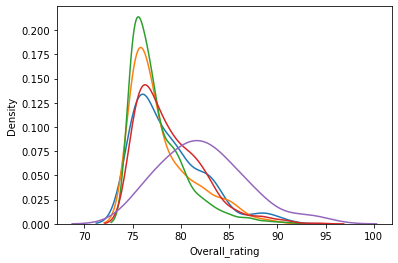

In [38]:
sns.distplot(move1, hist = False)
sns.distplot(move2, hist = False)
sns.distplot(move3, hist = False)
sns.distplot(move4, hist = False)
sns.distplot(move5, hist = False)
plt.show()
# graphical analysis

# median of skill moves 1 & 2, 1 & 4, 2 & 3 are equal 
# median of skill moves 1 & 3, 1 & 5, 2 & 4, 2 & 5, 3 & 4, 3 & 5, 4 & 5 are not equal 

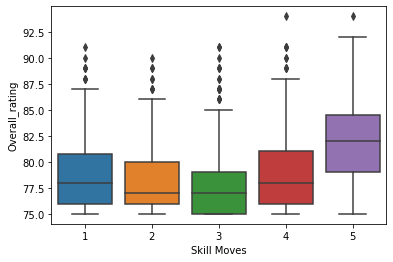

In [39]:
sns.boxplot(df['Skill Moves'], df['Overall_rating'])
plt.show()

# q1 of 1, 2, 4 are equal
# q2 of 2, 3 are equal

## Phone dataset

In [40]:
df = pd.read_csv('phone.csv')
df.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [41]:
df.info()
# information on dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          820 non-null    object 
 1   duration      820 non-null    float64
 2   item          820 non-null    object 
 3   month         820 non-null    object 
 4   network       820 non-null    object 
 5   network_type  820 non-null    object 
dtypes: float64(1), object(5)
memory usage: 38.6+ KB


In [42]:
df.describe(include = 'all')
# statistical description of dataset

,date,duration,item,month,network,network_type
count,820,820.000000,820,820,820,820
unique,738,NaN,3,5,7,4
top,16-01-15 18:07,NaN,call,2014-11,Vodafone,mobile
freq,6,NaN,388,229,215,601
mean,NaN,144.304936,NaN,NaN,NaN,NaN
std,NaN,45.687777,NaN,NaN,NaN,NaN
min,NaN,0.993514,NaN,NaN,NaN,NaN
25%,NaN,112.916486,NaN,NaN,NaN,NaN
50%,NaN,144.179434,NaN,NaN,NaN,NaN
75%,NaN,175.932308,NaN,NaN,NaN,NaN


In [43]:
df.shape
# shape of datset

(820, 6)

In [44]:
# missing value treatment
df.isnull().sum()
# no missing values 

date            0
duration        0
item            0
month           0
network         0
network_type    0
dtype: int64

In [45]:
num_data = df.select_dtypes(include = np.number)
num_data.head()
# numerical data from dataset

,duration
0,221.321120
1,81.610599
2,143.109111
3,111.888670
4,246.695171


In [46]:
cat_data = df.select_dtypes(exclude = np.number)
cat_data.head()
# categorical data from dataset

,date,item,month,network,network_type
0,15-10-14 6:58,data,2014-11,data,data
1,15-10-14 6:58,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,call,2014-11,Meteor,mobile
3,15-10-14 14:48,call,2014-11,Tesco,mobile
4,15-10-14 17:27,call,2014-11,Tesco,mobile


#### a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. Which of the Intervals are wider? Interpret the results.

#### b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.

#### c) Plot the distribution of duration with respect to each network in the same graph and Interpret the results from the graph.

#### d)	Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.

#### e)	Perform statistical tests to identify the relation between network and network_type. 

In [48]:
# a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. 
# Which of the Intervals are wider? Interpret the results.

x_bar = df['duration'].mean()
s = np.std(df['duration'], ddof= 1)
n = len(df)

z1 = stats.norm.isf(0.025) # 95%
z2 = stats.norm.isf(0.005) # 99%

ul = x_bar + (z1 * (s / np.sqrt(n)))
ll = x_bar - (z1 * (s / np.sqrt(n)))

print('95% range : ',ll.round(2),' - ', ul.round(2))

ul = x_bar + (z2 * (s / np.sqrt(n)))
ll = x_bar - (z2 * (s / np.sqrt(n)))

print('99% range : ',ll.round(2),' - ', ul.round(2))

# 95% ranges from 141.18 - 147.43 
# 99% ranges from 140.2 - 148.41 

# 99% range is wider than 95% range 

95% range :  141.18  -  147.43
99% range :  140.2  -  148.41


In [49]:
# b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.

# Ho : skew = 0 (data is normal)
# Ha : skew != 0 (data is not normal)

nw1 = df[df['network'] == 'data']['duration']
nw2 = df[df['network'] == 'Vodafone']['duration']
nw3 = df[df['network'] == 'Meteor']['duration']
nw4 = df[df['network'] == 'Tesco']['duration']
nw5 = df[df['network'] == 'Three']['duration']
nw6 = df[df['network'] == 'voicemail']['duration']
nw7 = df[df['network'] == 'landline']['duration']

print(stats.shapiro(nw1))
print(stats.shapiro(nw2))
print(stats.shapiro(nw3))
print(stats.shapiro(nw4))
print(stats.shapiro(nw5))
print(stats.shapiro(nw6))
print(stats.shapiro(nw7))

# p_val > sig.lvl
# null hypothesis accepted
# data is normal

ShapiroResult(statistic=0.9912639856338501, pvalue=0.48521795868873596)
ShapiroResult(statistic=0.9921150803565979, pvalue=0.3013075590133667)
ShapiroResult(statistic=0.9902763962745667, pvalue=0.7697541117668152)
ShapiroResult(statistic=0.9873518347740173, pvalue=0.5880236029624939)
ShapiroResult(statistic=0.9935033321380615, pvalue=0.47072795033454895)
ShapiroResult(statistic=0.9571559429168701, pvalue=0.31774839758872986)
ShapiroResult(statistic=0.9797297120094299, pvalue=0.6510748267173767)


In [50]:
print(nw1.skew())
print(nw2.skew())
print(nw3.skew())
print(nw4.skew())
print(nw5.skew())
print(nw6.skew())
print(nw7.skew())

# skewness of all networks is approx. 0
# data is normal

-0.11008225370585349
0.03131951007074219
0.15757888779847054
0.24617070309572897
-0.21229362126095477
-0.03602610665823378
-0.08991527446438294


<AxesSubplot:xlabel='network', ylabel='duration'>

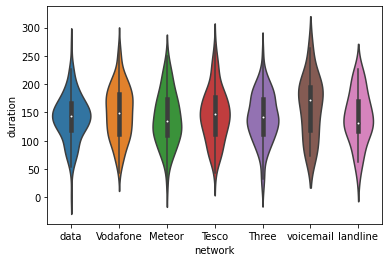

In [51]:
# c) Plot the distribution of duration with respect to each network in the same graph and 
# Interpret the results from the graph.

sns.violinplot(df['network'], df['duration'])

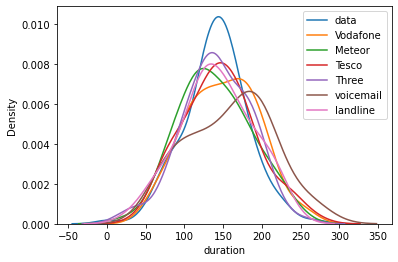

In [52]:
sns.distplot(nw1, hist = False)
sns.distplot(nw2, hist = False)
sns.distplot(nw3, hist = False)
sns.distplot(nw4, hist = False)
sns.distplot(nw5, hist = False)
sns.distplot(nw6, hist = False)
sns.distplot(nw7, hist = False)
plt.legend(['data', 'Vodafone', 'Meteor', 'Tesco', 'Three', 'voicemail','landline'])
plt.show()

In [53]:
# d)	Perform statistical tests to identify the relation between item and duration. 
# Detailed explanation of relation between the classes is required.

data = df[df['item'] == 'data']['duration']
call = df[df['item'] == 'call']['duration']
sms = df[df['item'] == 'sms']['duration']

# Ho : skew = 0 (data is normal)
# Ha : skew != 0 (data is not normal)

print(stats.shapiro(data))
print(stats.shapiro(call))
print(stats.shapiro(sms))

# p_val > sig.lvl
# null hypothesis accepted
# data is normal

# Ho : all variances are equal
# Ho : atleast one variance is not equal

print(stats.levene(data, call, sms))

# p_val = 0.03
# sig.lvl = 0.05
# p_val < sig.lvl
# alternate hypothesis accepted
# atleast one variance is not equal

# Ho : all means are equal
# Ha : atleast one mean is not equal

# assumptions of anova not satisfied
# kruskal test

t_stat, p_val = stats.kruskal(data, call, sms)
print('t_stat : ', t_stat)
print('p_val : ', p_val)

# p_val = 0.16
# sig.lvl = 0.05
# p_val > sig.lvl
# null hypothesis accepted
# all means are equal

# no relation found b/w item and duration

ShapiroResult(statistic=0.9912639856338501, pvalue=0.48521795868873596)
ShapiroResult(statistic=0.9973042011260986, pvalue=0.7803382277488708)
ShapiroResult(statistic=0.9943404197692871, pvalue=0.37839275598526)
LeveneResult(statistic=3.4300976447008424, pvalue=0.03285087780533987)
t_stat :  3.5659414348706377
p_val :  0.16813791437741693


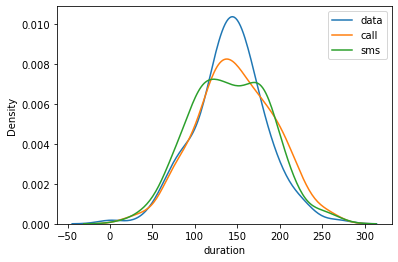

In [54]:
sns.distplot(data, hist = False)
sns.distplot(call, hist = False)
sns.distplot(sms, hist = False)
plt.legend(['data', 'call', 'sms'])
plt.show()
# graphical representation of means of different items

In [55]:
# e)	Perform statistical tests to identify the relation between network and network_type. 

# chisquare test of independance test

# Ho : network and network type are independant
# Ha : network and network type are dependant

obs = pd.crosstab(df['network'], df['network_type'])
obs

network_type,data,landline,mobile,voicemail
network,,,,
Meteor,0,0,87,0
Tesco,0,0,84,0
Three,0,0,215,0
Vodafone,0,0,215,0
data,150,0,0,0
landline,0,42,0,0
voicemail,0,0,0,27


In [56]:
f_stat, p_val, dof, exp = stats.chi2_contingency(obs, correction = True)
print('f_stat : ', f_stat)
print('p_val : ', p_val)
print('dof : ', dof)
print('exp : ', exp)

# p_val = 0
# sig.lvl = 0.05
# p_val < sig.lvl
# alternate hypothesis accepted
# network and network type are dependant

f_stat :  2460.0
p_val :  0.0
dof :  18
exp :  [[ 15.91463415   4.45609756  63.76463415   2.86463415]
 [ 15.36585366   4.30243902  61.56585366   2.76585366]
 [ 39.32926829  11.01219512 157.57926829   7.07926829]
 [ 39.32926829  11.01219512 157.57926829   7.07926829]
 [ 27.43902439   7.68292683 109.93902439   4.93902439]
 [  7.68292683   2.15121951  30.78292683   1.38292683]
 [  4.93902439   1.38292683  19.78902439   0.88902439]]
